# **Restaurant Chatbot**

## **spaCy Setup**

In [ ]:
!python -m spacy download en_core_web_md
import spacy
from spacy import displacy
from IPython.core.display import display, HTML

# Load spaCy's medium English model
spacy_model_name = "en_core_web_md"
nlp = spacy.load(spacy_model_name)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 13.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## **Entity (NER) Extraction**

In [ ]:
# Retrieve the named entity recognition (NER) labels from the model
entity_labels = nlp.get_pipe("ner").labels

# Display each entity label along with its explanation
for ent_label in entity_labels:
    print(f"{ent_label}: {spacy.explain(ent_label)}")

# Process the input text to extract named entities and display them in a table
def extract_entities(text_str, label_info):
    doc_obj = nlp(text_str)

    # Identify unique entity labels in the text
    unique_entity_labels = set(ent.label_ for ent in doc_obj.ents)
    total_entities_found = len(doc_obj.ents)
    unique_label_count = len(unique_entity_labels)

    print(f"Extracted Entities: {total_entities_found}")
    print(f"Distinct Entity Types: {unique_label_count}\n")

    # If no entities are found, display a message and exit the function
    if not doc_obj.ents:
        print("No named entities detected in the input.")
        return

    # Determine optimal column widths based on entity text lengths and descriptions
    entity_col_width = max((len(ent.text) for ent in doc_obj.ents), default=0) + 2
    label_col_width = max((len(ent.label_) for ent in doc_obj.ents), default=0) + 4
    desc_col_width = max((len(label_info.get(ent.label_, '')) for ent in doc_obj.ents), default=0) + 4

    # Print header for the entity table
    header_line = f"{'Entity'.ljust(entity_col_width)} {'Label'.ljust(label_col_width)} Description"
    print(header_line)
    print("-" * len(header_line))

    # Display each entity with its label and description
    for idx, ent in enumerate(doc_obj.ents, start=1):
        entity_description = label_info.get(ent.label_, "No description available")
        print(f"{idx}) {ent.text.ljust(entity_col_width)} {ent.label_.ljust(label_col_width)} {entity_description}")

    # Visualize the entities using spaCy's displaCy if available
    if doc_obj.ents:
        print("\nEntity Visualization:")
        html_output = displacy.render(doc_obj, style="ent", page=True)
        display(HTML(html_output))

    print("=" * 100, "\n")

CARDINAL: Numerals that do not fall under another type
DATE: Absolute or relative dates or periods
EVENT: Named hurricanes, battles, wars, sports events, etc.
FAC: Buildings, airports, highways, bridges, etc.
GPE: Countries, cities, states
LANGUAGE: Any named language
LAW: Named documents made into laws.
LOC: Non-GPE locations, mountain ranges, bodies of water
MONEY: Monetary values, including unit
NORP: Nationalities or religious or political groups
ORDINAL: "first", "second", etc.
ORG: Companies, agencies, institutions, etc.
PERCENT: Percentage, including "%"
PERSON: People, including fictional
PRODUCT: Objects, vehicles, foods, etc. (not services)
QUANTITY: Measurements, as of weight or distance
TIME: Times smaller than a day
WORK_OF_ART: Titles of books, songs, etc.


## **Tokenization, Part-Of-Speech (POS) Tagging & Lemmatization**

In [ ]:
# Analyze the input text to display tokens, part-of-speech (POS) tags, POS explanations, and lemmas in a formatted table
def analyze_text(input_text):
    doc_obj = nlp(input_text)

    # Count the total number of tokens in the input text
    token_count = len(doc_obj)
    print(f"Total tokens in input: {token_count}\n")

    # If no tokens are found, exit the function
    if token_count == 0:
        print("No valid tokens found in the input text.")
        return

    # Calculate maximum column widths for formatting the output table
    max_token_width = max((len(token.text) for token in doc_obj), default=0) + 2
    max_pos_width = max((len(token.pos_) for token in doc_obj), default=0) + 2
    max_expl_width = max((len(spacy.explain(token.tag_)) for token in doc_obj), default=0) + 2
    max_lemma_width = max((len(token.lemma_) for token in doc_obj), default=0) + 2

    # Prepare table header using calculated widths
    header_str = f"{'Index':<6}{'Token':<{max_token_width}}{'POS':<{max_pos_width}}{'POS Explanation':<{max_expl_width}}{'Lemma':<{max_lemma_width}}"
    print(header_str)
    print("-" * len(header_str))

    # Display each token's details in a formatted table
    for idx, token in enumerate(doc_obj, start=1):
        token_explanation = spacy.explain(token.tag_) or "N/A"
        print(f"{idx:<6}{token.text:<{max_token_width}}{token.pos_:<{max_pos_width}}{token_explanation:<{max_expl_width}}{token.lemma_:<{max_lemma_width}}")

    print("=" * len(header_str))  # Footer for readability
    print("\n")


# Sample usage with a fixed input text
print()
print("Analyzing a sample paragraph with all 18 NER types using spaCy's pretrained model", "'" + spacy_model_name + "'")
print()

sample_text = "On March 15, 2024, during the Olympic Games, thousands gathered at Madison Square Garden to witness Lionel Messi unveil Tesla Model Z, the latest innovation in electric vehicles. The German government pledged $5.6 billion to develop charging infrastructure across Europe, particularly near the Alps. According to Forbes, over 75,000 units were pre-ordered within hours. Experts from MIT highlighted that the car’s 98% energy efficiency surpasses previous models. A report in The New York Times emphasized its impact on urban transport. Officials cited the Clean Energy Act as a driving force behind its success. The event, held at 8:30 PM, also featured a speech in Japanese, reflecting global interest. The International Automobile Federation praised the launch as a breakthrough in sustainable mobility."

# Generate a dictionary of entity definitions using spaCy's explain function
entity_definitions = {label: spacy.explain(label) for label in nlp.get_pipe("ner").labels}

# Call functions to extract entities and analyze tokens from the sample text
extract_entities(sample_text, entity_definitions)
analyze_text(sample_text)
print()

# Loop to allow the user to analyze their own input using spaCy's 'en_core_web_sm' model
user_input_count = 1  # Counter for user inputs

while True:
    print("\nAnalyze your input using spaCy's pretrained model 'en_core_web_sm'.")
    print("Type 'exit' or 'quit' to terminate this spaCy input analyzer.")
    print("=" * 100)

    # Capture user input
    user_text = input(f"You (Input {user_input_count}): ").strip()

    # Exit condition if user types 'exit' or 'quit'
    if user_text.lower() in ["exit", "quit"]:
        print("\nSuccessfully exited the program.")
        break

    # Process the input text with spaCy
    doc_obj = nlp(user_text)

    # Display a separator and then extract and analyze entities from the input text
    print("-" * 100)
    extract_entities(user_text, entity_definitions)
    analyze_text(user_text)
    print("=" * 100)

    user_input_count += 1


Analyzing a sample paragraph with all 18 NER types using spaCy's pretrained model 'en_core_web_md'

Extracted Entities: 20
Distinct Entity Types: 13

Entity                                    Label        Description
------------------------------------------------------------------
1) March 15, 2024                            DATE         Absolute or relative dates or periods
2) the Olympic Games                         EVENT        Named hurricanes, battles, wars, sports events, etc.
3) thousands                                 CARDINAL     Numerals that do not fall under another type
4) Madison Square Garden                     FAC          Buildings, airports, highways, bridges, etc.
5) Lionel Messi                              PERSON       People, including fictional
6) Tesla Model Z                             PRODUCT      Objects, vehicles, foods, etc. (not services)
7) German                                    NORP         Nationalities or religious or political groups
8) $5.6

<IPython.core.display.HTML object>


Total tokens in input: 143

Index Token           POS    POS Explanation                                     Lemma           
-------------------------------------------------------------------------------------------------
1     On              ADP    conjunction, subordinating or preposition           on              
2     March           PROPN  noun, proper singular                               March           
3     15              NUM    cardinal number                                     15              
4     ,               PUNCT  punctuation mark, comma                             ,               
5     2024            NUM    cardinal number                                     2024            
6     ,               PUNCT  punctuation mark, comma                             ,               
7     during          ADP    conjunction, subordinating or preposition           during          
8     the             DET    determiner                                          the     

5 entity types (GPE, LANGUAGE, ORDINAL, QUANTITY, WORK_OF_ART) were not detected.

The spaCy model (en_core_web_md) has limited capability in recognizing all 18 NER categories within a single passage. It failed to classify WORK_OF_ART correctly and struggled with certain categories like GPE and LANGUAGE. The model also overused some labels, reducing entity diversity.

These limitations suggest that manual adjustments or fine-tuning may be needed for better accuracy.



## **Dataset Upload**

In [ ]:
# Install the necessary library for Google Colab if not already installed
!pip install google-colab

# Import the file-upload utility from google.colab
from google.colab import files

# Upload dataset files into Colab
uploaded_files = files.upload()

# Print details about each uploaded file
for file_name in uploaded_files.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=file_name, length=len(uploaded_files[file_name])))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.0 MB/s eta 0:00:00


Saving Restaurant Qns Dataset.json to Restaurant Qns Dataset.json
User uploaded file "Restaurant Qns Dataset.json" with length 158057 bytes


## **Dataset Projection**

In [ ]:
import json

local_path = 'Restaurant Qns Dataset.json'

# Load the JSON file
with open(local_path) as f:
    data = json.load(f)

# Initialize a list to hold all text elements
all_texts = []

# Iterate over each item in 'data' and extend the texts list with each 'text' from every 'intent'
for item in data['topics']:
    all_texts.extend(item['text'])

# Initialize a list to hold all 'intent' indices for each 'text' belonging in the same 'intent'
intent_indices = []

# Create a mapping from 'intent' to numerical indices
unique_intents = {item['intent']: idx for idx, item in enumerate(data['topics'])}

# Iterate over each item in 'intent' to process the 'text' list
for item in data['topics']:
    intent_index = unique_intents[item['intent']]
    # Append the intent index for each 'text' in the current item's 'text' list
    for _ in item['text']:
        intent_indices.append(intent_index)

labels = intent_indices

print ("Text:", all_texts)
print("-"*69420)
print ("Intent Indices (Labels for Text):", labels)

Text: ['I need to cancel my order because I changed my mind as soon as possible that would be great. Please act on this soon.', 'I need to cancel my order please help me with it urgently. I appreciate your prompt action.', "I need to cancel my order because I changed my mind please if you could assist. It's urgent.", 'I made a mistake in ordering so cancel my order kindly thanks. Thank you for understanding.', 'Cancel the order I just placed because I changed my mind immediately please help.', 'I made a mistake in ordering so cancel my order please. Thank you for understanding.', 'Cancel my order immediately as I made an error urgently thanks. I really need this done.', "I need to cancel my order please help me with it urgently. It's urgent.", 'Cancel my order immediately as I made an error now. I appreciate your prompt action.', "I need to cancel my order please help me with it now please help. It's urgent.", 'I want to withdraw my order please cancel it as soon as possible if you cou

## **Dataset Visualisation**

Intent: Cancel Order, Text Count: 300
Intent: Buy Menu Item, Text Count: 300
Intent: Change Order, Text Count: 300
Intent: Refund, Text Count: 300
Intent: Payment Issue, Text Count: 300
Intent: Feedback Submission Query, Text Count: 300
Total number of 'text': 1800



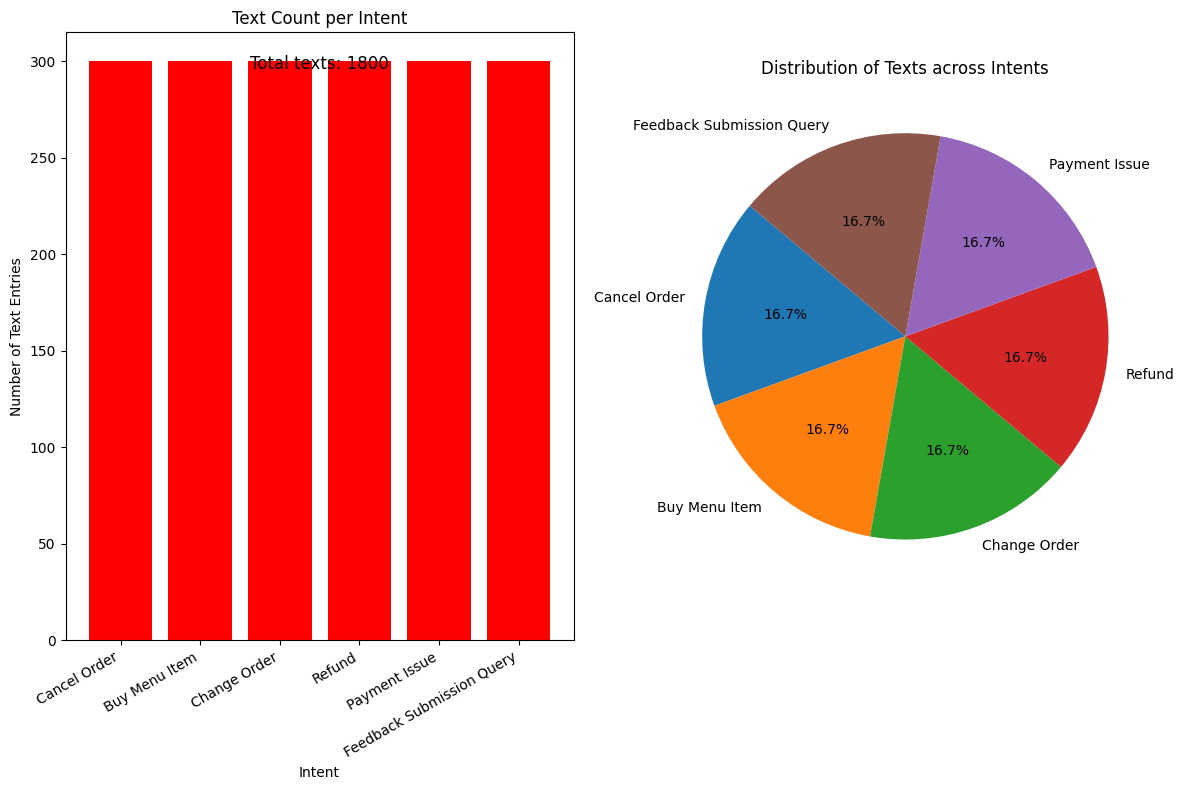

In [ ]:
import matplotlib.pyplot as plt

# Compute text counts per intent from the dataset
intent_text_counts = {}
total_text_entries = 0
for topic in data['topics']:
    current_intent = topic['intent']
    text_count = len(topic['text'])
    total_text_entries += text_count
    intent_text_counts[current_intent] = text_count
    print("Intent: {}, Text Count: {}".format(current_intent, text_count))

print("Total number of 'text': {}".format(total_text_entries))
print()

# Prepare data for plotting
intent_keys = list(intent_text_counts.keys())
counts = list(intent_text_counts.values())

# Create a bar plot for the text count per intent
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.bar(intent_keys, counts, color='red')
plt.xlabel("Intent")
plt.ylabel("Number of Text Entries")
plt.title('Text Count per Intent')
plt.xticks(rotation=90)

# Annotate with the total text count
total_message = "Total texts: {}".format(total_text_entries)
plt.text(0.5, 0.94, total_message, transform=plt.gca().transAxes, ha='center', fontsize=12, color='black')

plt.gcf().autofmt_xdate()  # Auto-adjust x-axis labels

# Create a pie chart for the distribution of texts across intents
plt.subplot(1, 2, 2)
plt.pie(counts, labels=intent_keys, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Texts across Intents')

plt.tight_layout()
plt.show()

## **Dataset Cleaning**

In [ ]:
# Clean a list of sentences by removing stop words and converting tokens to lemmas
def clean_sentences(sentences):
    cleaned_sentences = []

    for sentence in sentences:
        # Process each sentence with spaCy
        doc_obj = nlp(sentence)

        # Create a list of lemmas for tokens that are not stop words
        lemmas = [token.lemma_ for token in doc_obj if not token.is_stop]

        # Reassemble the sentence from the lemmas
        cleaned_sentence = " ".join(lemmas)
        cleaned_sentences.append(cleaned_sentence)

    return cleaned_sentences

# Process the texts using the clean_sentences function
processed_texts = clean_sentences(all_texts)
print(processed_texts)

['need cancel order change mind soon possible great . act soon .', 'need cancel order help urgently . appreciate prompt action .', 'need cancel order change mind assist . urgent .', 'mistake order cancel order kindly thank . thank understanding .', 'cancel order place change mind immediately help .', 'mistake order cancel order . thank understanding .', 'cancel order immediately error urgently thank . need .', 'need cancel order help urgently . urgent .', 'cancel order immediately error . appreciate prompt action .', 'need cancel order help help . urgent .', 'want withdraw order cancel soon possible assist . appreciate prompt action .', 'cancel order order mistake right away . need .', 'mistake order cancel order right away great . important .', 'need cancel order help help .', 'like cancel order error right away help .', 'cancel order want anymore soon possible help . act soon .', 'like cancel order error right away assist . urgent .', 'need cancel order change mind immediately . urge

## **Model Preparation**

In [ ]:
!pip install accelerate -U
!pip install transformers[torch]

from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments, TrainerCallback, EarlyStoppingCallback
from sklearn.model_selection import train_test_split
import pandas as pd
from torch.utils.data import Dataset, DataLoader

# Split the processed texts and labels into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(processed_texts, labels, test_size=0.2)

# Initialize the tokenizer from the pre-trained DistilBERT model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Custom dataset class for intent classification
class IntentDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=128)
        self.labels = labels

    def __getitem__(self, idx):
        # Convert encoded inputs and labels into torch tensors
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create dataset objects for training and validation
train_dataset = IntentDataset(train_texts, train_labels)
val_dataset = IntentDataset(val_texts, val_labels)

# Load the pre-trained DistilBERT model for sequence classification with the correct number of labels
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(set(labels)))  # ~268 MB

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.1/342.1 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


The terminal output indicates that the DistilBERT model’s final classification layer has been customized to suit my specific dataset.

In [ ]:
# Custom callback to print evaluation metrics during training
class CustomPrintCallback(TrainerCallback):
    def on_log(self, args, state, control, logs=None, **kwargs):
        # Print evaluation loss and accuracy when logged
        if 'eval_loss' in logs:
            print(f"Step {state.global_step}: Validation Loss = {logs['eval_loss']}")
        if 'eval_accuracy' in logs:
            print(f"Step {state.global_step}: Validation Accuracy = {logs['eval_accuracy']}")

import numpy as np
from sklearn.metrics import accuracy_score

# Compute the accuracy metric for evaluation
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {"accuracy": accuracy_score(labels, predictions)}

# Global dictionary to store training and evaluation metrics
global_metrics = {
    'training_loss': [],
    'validation_loss': [],
    'validation_accuracy': []
}

# Callback to log custom metrics during training
class CustomMetricsLogger(TrainerCallback):
    def on_log(self, args, state, control, logs=None, **kwargs):
        if 'loss' in logs:
            global_metrics['training_loss'].append((state.global_step, logs['loss']))
        if 'eval_loss' in logs:
            global_metrics['validation_loss'].append((state.global_step, logs['eval_loss']))
        if 'eval_accuracy' in logs:
            global_metrics['validation_accuracy'].append((state.global_step, logs['eval_accuracy']))

# Early stopping callback with a patience of 3 steps
early_stopping_callback = EarlyStoppingCallback(early_stopping_patience=3)

## **Training (PyTorch)**

For training, the model requires an API key which can be obtained from wandb by creating an account.

Using Google Colab's CPU results in training time that takes around 12 minutes.

In [ ]:
import torch

# Check for CUDA availability and display GPU info if available
if torch.cuda.is_available():
    gpu_device = torch.cuda.current_device()
    gpu_name = torch.cuda.get_device_name(gpu_device)
    print(f"CUDA is available and the GPU is {gpu_name}")
    print()
    !nvidia-smi
else:
    print("CUDA is not available")

CUDA is not available


In [ ]:
# Define training hyperparameters and settings
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=2,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=50, # Log every 50 steps
    eval_strategy="steps", # Evaluate every `eval_steps`
    eval_steps=50, # Evaluate and log eval metrics every 50 steps
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

# Initialize the Trainer with the model, datasets, and callbacks
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[CustomPrintCallback(), CustomMetricsLogger(), EarlyStoppingCallback(early_stopping_patience=3)]
)

# Start model training
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: kiranraj86 (kiranraj86-nanyang-technological-university-singapore) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss,Validation Loss,Accuracy
50,1.771100,1.725672,0.550000
100,1.563900,1.237207,0.947222
150,0.920700,0.429541,0.997222
200,0.239400,0.064971,1.000000
250,0.041700,0.015517,1.000000
300,0.015100,0.007608,1.000000
350,0.008500,0.004527,1.000000


Step 50: Validation Loss = 1.7256717681884766
Step 50: Validation Accuracy = 0.55
Step 100: Validation Loss = 1.2372074127197266
Step 100: Validation Accuracy = 0.9472222222222222
Step 150: Validation Loss = 0.42954134941101074
Step 150: Validation Accuracy = 0.9972222222222222
Step 200: Validation Loss = 0.06497123092412949
Step 200: Validation Accuracy = 1.0
Step 250: Validation Loss = 0.015517405234277248
Step 250: Validation Accuracy = 1.0
Step 300: Validation Loss = 0.007608101237565279
Step 300: Validation Accuracy = 1.0
Step 350: Validation Loss = 0.004526788368821144
Step 350: Validation Accuracy = 1.0


Could not locate the best model at ./results/checkpoint-200/pytorch_model.bin, if you are running a distributed training on multiple nodes, you should activate `--save_on_each_node`.


TrainOutput(global_step=350, training_loss=0.6514853359971727, metrics={'train_runtime': 766.4902, 'train_samples_per_second': 3.757, 'train_steps_per_second': 0.47, 'total_flos': 10867241448000.0, 'train_loss': 0.6514853359971727, 'epoch': 1.9444444444444444})

## **Metric Plotting**

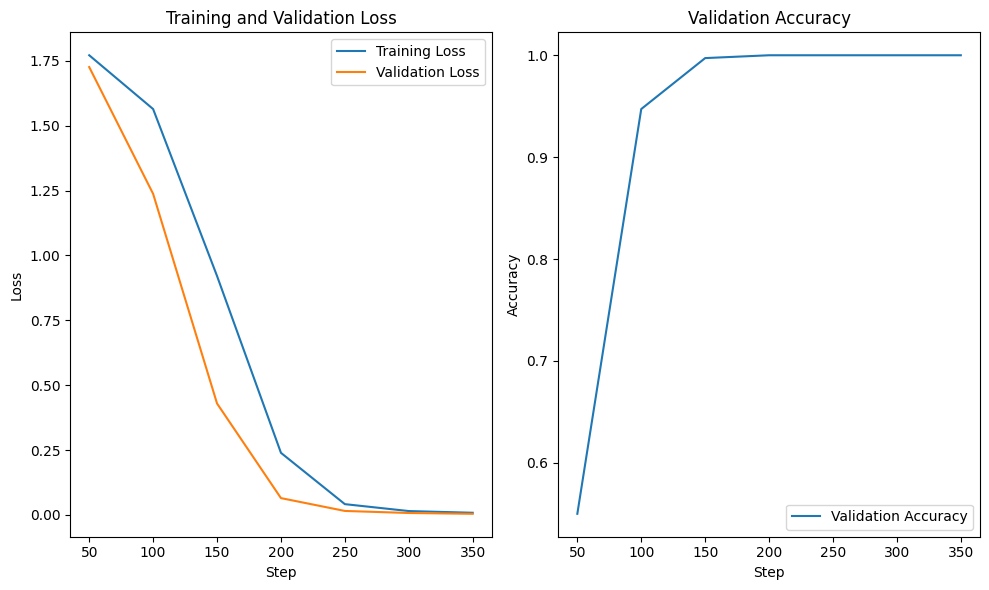

In [ ]:
import matplotlib.pyplot as plt

# Unpack the global metrics for plotting training progress
steps, train_losses = zip(*global_metrics['training_loss'])
_, val_losses = zip(*global_metrics['validation_loss'])
_, val_accuracies = zip(*global_metrics['validation_accuracy'])

plt.figure(figsize=(10, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(steps, train_losses, label='Training Loss')
plt.plot(steps, val_losses, label='Validation Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot validation accuracy over training steps
plt.subplot(1, 2, 2)
plt.plot(steps, val_accuracies, label='Validation Accuracy')
plt.xlabel('Step')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## **Chatbot Interaction**

In [ ]:
model.eval()  # Set the model to evaluation mode

# Introduction message for the restaurant chatbot
print("Welcome to our Restaurant ChatBot!")
print("I can help you with six types of requests including ordering, modifying, and canceling your meal selections.")
print("Our menu includes: French Fries, Pizza, Hamburger, Chocolate Cake, and Espresso.")
print("I am also here to process refunds, assist with payment issues, and capture your feedback.")
print()
print("\n*** Type 'exit' or 'quit' at any time to close the ChatBot session ***\n")
print()

# Mapping from indices back to intent names
index_to_intent = {idx: intent for intent, idx in unique_intents.items()}

# Extract response from corresponding intent
intent_to_response = {item['intent']: item['responses'] for item in data['topics']}

user_input_count = 1
confidence_threshold = 0.7  # Set a minimum confidence threshold for predictions

# Start the chatbot loop for manual interaction
while True:
    user_message = input(f"You (User Input {user_input_count}): ")
    print("-" * 169)

    # Check for exit condition
    if user_message.lower() in ["exit", "quit"]:
        print("*** Successfully Quit Terminal Chatbot ***")
        print("-" * 169)
        break

    # Tokenize and encode the user message for the model
    encoded_inputs = tokenizer(user_message, return_tensors="pt", truncation=True, padding=True, max_length=128)

    # Move the inputs to the same device as the model
    encoded_inputs = {key: val.to(next(model.parameters()).device) for key, val in encoded_inputs.items()}

    with torch.no_grad():
        outputs = model(**encoded_inputs)
        # Apply softmax to get prediction probabilities
        probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
        max_prob, predicted_class_id = torch.max(probabilities, dim=1)
        predicted_intent = index_to_intent[predicted_class_id.item()]

        # Determine the chatbot response based on confidence threshold
        if max_prob.item() < confidence_threshold:
            chatbot_response = "I do not understand you, please rephrase."
        else:
            # Assuming the response is stored as a list of strings; join them for output
            chatbot_response = ' '.join(intent_to_response[predicted_intent])

        print(f"Response: {chatbot_response} | Predicted intent: {predicted_intent} (Confidence: {max_prob.item():.2f})")
        print("-" * 169)
        print("***Enter 'exit' or 'quit' to terminate this ChatBot***")

    print()
    user_input_count += 1

Welcome to our Restaurant ChatBot!
I can help you with six types of requests including ordering, modifying, and canceling your meal selections.
Our menu includes: French Fries, Pizza, Hamburger, Chocolate Cake, and Espresso.
I am also here to process refunds, assist with payment issues, and capture your feedback.


*** Type 'exit' or 'quit' at any time to close the ChatBot session ***


You (User Input 1): Can I get a hamburger immediately
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Response: Your order has been successfully placed. | Predicted intent: Buy Menu Item (Confidence: 0.99)
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
***Enter 'exit' or 'quit' to terminate this ChatBot***

You (User Input 2): I need to update my order with a sma